<a href="https://colab.research.google.com/github/RizalAzmi99/Dataset2HeartFailureClinicialRecord/blob/main/Dataset2HeartFailureClinicialRecord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Mengatur path file.
file_path = '/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 data teratas untuk memastikan data sudah masuk
print("Data berhasil di-load:")
display(df.head())

# Mengecek info dataset (tipe data dan apakah ada yang kosong)
print("\nInfo Dataset:")
df.info()

Data berhasil di-load:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Menentukan Fitur (X) dan Target (y)
# Target kita adalah 'DEATH_EVENT'
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# 2. Membagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisasi Data (Penting untuk data medis agar skalanya sama)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Membuat dan Melatih Model (Contoh: Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluasi Model
y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi Model: 0.75

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60


Confusion Matrix:
 [[33  2]
 [13 12]]


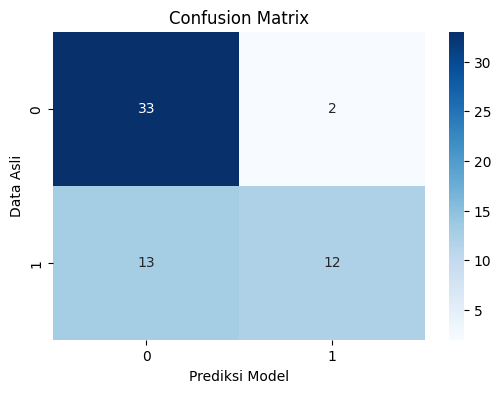

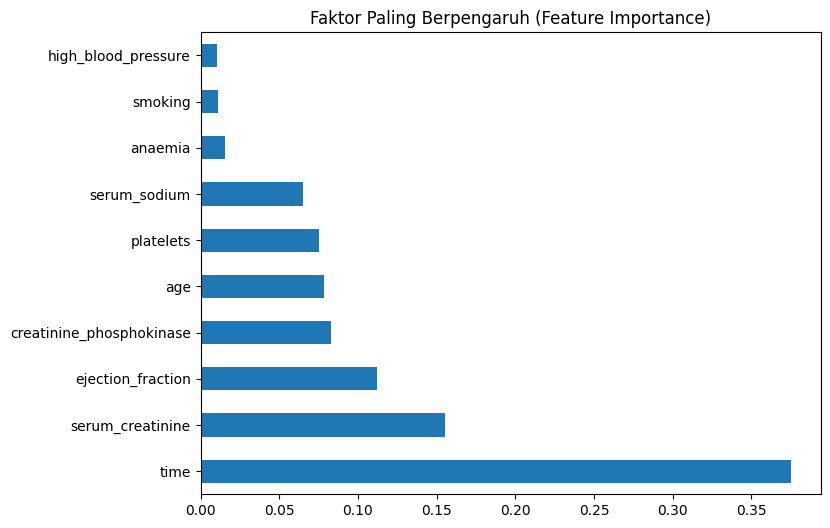

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tambahan 1: Membuat Grafik Confusion Matrix ---
# (Agar terlihat berapa prediksi yang benar dan salah dalam bentuk gambar)
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Data Asli')
plt.xlabel('Prediksi Model')
plt.show()

# --- Tambahan 2: Grafik Fitur Paling Penting ---
# (Untuk melihat faktor apa yang paling menyebabkan kematian)
plt.figure(figsize=(8,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Faktor Paling Berpengaruh (Feature Importance)')
plt.show()